In [1]:
# setup notebook
# notebook formatting
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# pretty print all cell's output and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# enable split cells in notebook
# if not installed:  pip install jupyter_contrib_nbextensions; then repeat this cmd
!jupyter nbextension enable splitcell/splitcell  

# fix RISE scollbar missing
# if RISE scroll not working fix path to match your jupyter nbconfig, uncomment below and run
# from traitlets.config.manager import BaseJSONConfigManager
# path = "~\user\.jupyter\nbconfig"
# cm = BaseJSONConfigManager(config_dir=path)

# cm.update("livereveal", {
#              "scroll": True,
# });

# imports
import os
import random

# math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# visualization - imports and setting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

Enabling notebook extension splitcell/splitcell...
      - Validating: ok


# Effective Visualizations
<table>
    <th style="float:center; width:100%"></th>
  <tr>
      <td><img src="./images/minard.napoleon_russia_1812.png" width=500 alt="Approximation of Napoleon Russian Campaign" title="European context of Napoleon Russian Campaign" style="float:center; width:100%"/></td>
  </tr>
</table>


### About Me...
* Chris Brousseau
* @surfaceowl
* chris@surfaceowl.com


### What I do...
* Founder: Surface Owl
* Data Scientist
* Python Development
* PyBay Diversity & Inclusion Chair
* Recovering Consultant


# Agenda

1- Understand why effective visualizations are important

2- Learn how to choose the right visual approach

3- Learn about the python visualization universe

4- Foundation - matplotlib

5- Future - bokeh


In [ ]:
%%html
<style>
style="vertical-align: text-top";
table {float:left}
</style>

# 1- Understand why effective visualizations are important


# Why Visualizations?<br>
- communicate information + story to <b> accomplish a goal</b>
- goal can be:
   - create understanding
   - convice someone to take action

- Graphics provide super efficient compression of data

- [what makes a good visualization?  source: information is beautiful](https://informationisbeautiful.net/visualizations/what-makes-a-good-data-visualization/)

- People have powerful ability of visual perception - let's help them use it



# Why visualization is important:  *Create Understanding*<br>
# Charles Minard's Map of the March to Moscow

<img src="./images/minard.napoleon_russia_1812.png" alt="Charles Joseph Minards map of Napoleon Russian Campaign" title="The Best Statistical Graph ever drawn - Charles Joseph Minards map of Napoleon Russian Campaign" />



Supporting Data:

Temperature data in:
°re:  [-26.0, -30.0, -24.0, -20.0, -11.0, -21.0, -9.0, 0.0]
°c:   [-32.0, -38.0, -30.0, -25.0, -14.0, -26.0, -11.0, 0.0]
°f:   [-26.0, -36.0, -22.0, -13.0, 7.0, -15.0, 12.0, 32.0] 

Total # of days marching back from Moscow:  44


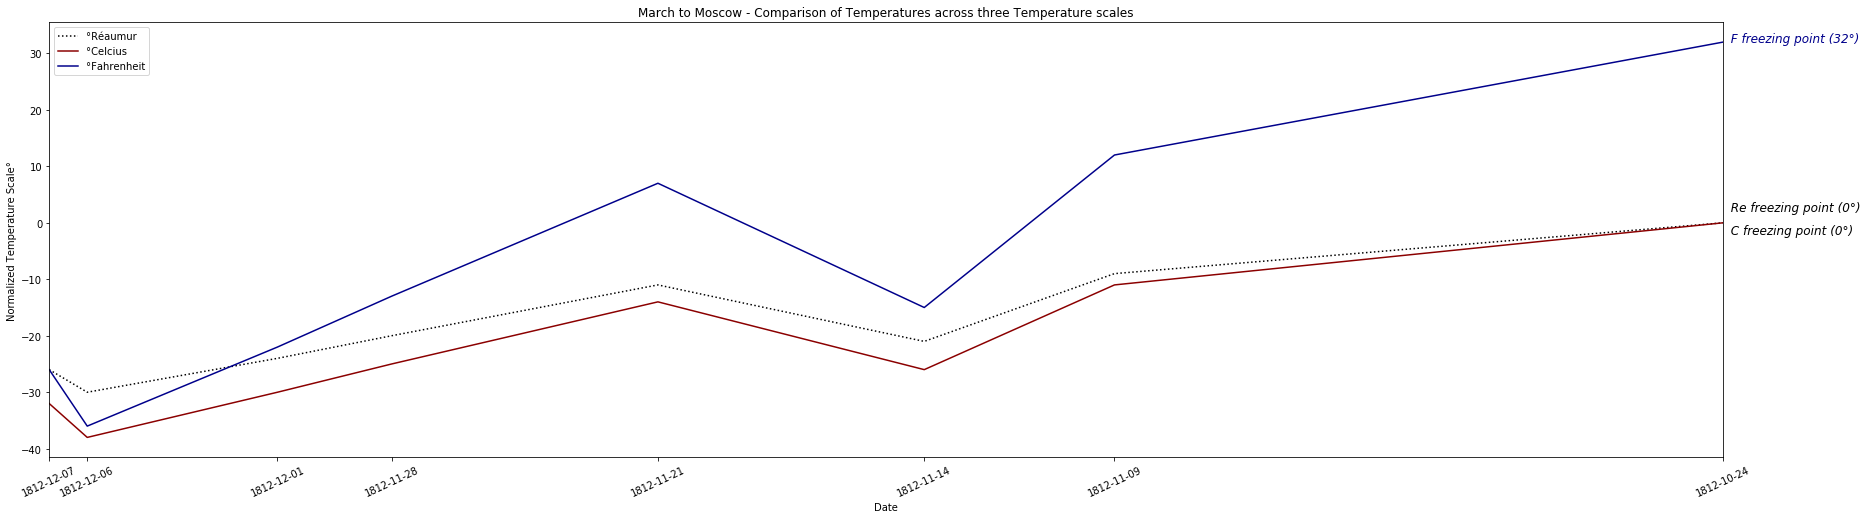

In [43]:
# Minard's chart uses a different temperature scaled called the Réaumur scale
# water freeze @ 0°, boils at 80°
# https://en.wikipedia.org/wiki/R%C3%A9aumur_scale
# what are these temperatures in scales we are more familiar with (°F, °C)?
import datetime as dt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# get data for chart, format dates for matplotlib; 
# data source:  https://www.cs.uic.edu/~wilkinson/TheGrammarOfGraphics/minard.txt
dates = ['12/7/1812', '12/6/1812', '12/1/1812', '11/28/1812', '11/21/1812', '11/14/1812', '11/9/1812', '10/24/1812']
dates = [dt.datetime.strptime(date,'%m/%d/%Y').date() for date in dates]
total_days_from_moscow = (dates[0] - dates[-1]).days  # total # of days on chart


# temp data - temps in °Re
temps_re = [-26.0, -30.0, -24.0, -20.0, -11.0, -21.0, -9.0, 0.0]

# conversion to Celcius and Fahrenheit
def re_to_c(temp_re):
    return round(temp_re * (5/4), 0)

def re_to_f(temp_re):
    return round((temp_re * 9/4) + 32, 0)

temps_c = [re_to_c(temp) for temp in temps_re]
temps_f = [re_to_f(temp) for temp in temps_re]

print("\n\nSupporting Data:\n\nTemperature data in:")
print("°re: ", temps_re)
print("°c:  ", temps_c)
print("°f:  ", temps_f, "\n")
print("Total # of days marching back from Moscow: ", total_days_from_moscow)

# setup chart
plt.figure(figsize=(30,8));
plt.xlim(dates[0], dates[-1])  # reverse x axis to matches Minard's chart
plt.xticks(dates, dates, rotation=25)
plt.title("March to Moscow - Comparison of Temperatures across three Temperature scales")
plt.xlabel("Date")
plt.ylabel("Normalized Temperature Scale°")
plt.plot(dates, temps_re, color="black", linestyle="dotted")
plt.plot(dates, temps_c, color="darkred")
plt.plot(dates, temps_f,color="darkblue")
plt.text(dates[-1], 2, "  Re freezing point (0°)", fontsize=12, fontstyle="italic", color="black")
plt.text(dates[-1], -2, "  C freezing point (0°)", fontsize=12, fontstyle="italic", color="black")
plt.text(dates[-1], 32, "  F freezing point (32°)", fontsize=12, fontstyle="italic", color="darkblue")
plt.legend(("°Réaumur", "°Celcius", "°Fahrenheit"))
plt.show();


In [59]:
%%html
<!DOCTYPE html>
<html>
<head>
<style>
html, body {
  font-size: 140%;
}

img.challenger {
  height: auto%;
  width: 90%;
}
</style>

<p style="font-weight:bold; font-size:185%;">Why is visualization important?  <i>Convince people to Take Action</i></p><br>

</head>
<body>

<table> <tr> <th style="width:50%"></th> <th></th> </tr> 
    <tr> 
        <td><a href="https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster"><img class="challenger" src="./images/challenger.photo.1110px-Challenger_explosion.jpg" alt="Space Shuttle Challenger Disaster - 28 Jan 1986" title="Space Shuttle Challenger Disaster"/></a></td>
        <td style="vertical-align:top; text-align:left; font-size: 160%"> <strong>
            <b>Challenger Disaster - 28 Jan 1986</b><br><br>
            - All seven crew members died<br><br> 
            - five NASA astronauts, one payload specialist, and a civilian school teacher<br><br>
            - caused by the failure of O-ring seals in right solid rocket booster<br><br>
            - NASA managers disregarded NO-LAUNCH warnings from engineers<br><br><br>  
            - <i>...but the warnings were confusing</i><br><br></strong> </td> 
    </tr>
    <tr>
        <td></td>
        <td></td>
    </tr>
    <tr >
            <td>
            </td>
        <td style="text-align:left; font-size: 120%"> 
            <a href="https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster"><strong>link: challenger disaster - wikipedia</strong></a></td>
        <td> 
    </tr >
    <tr>
            <td>
            </td>
            <td style="text-align:left; font-size: 120%"> 
            <a href="https://forum.nasaspaceflight.com/index.php?PHPSESSID=n2pbop2fh60010n76lmcnh4po7&action=dlattach;topic=8535.0;attach=25186"><strong>link: Rogers Commission Report</strong></a>
        </td>

    </tr>
    <tr>
        <td>
        </td>
        <td style="text-align:left; font-size: 120%"> <br>
            <a href="https://en.wikipedia.org/wiki/Rogers_Commission_Report"><strong>link: tldr - wikipedia page on Rogers Commission Report</strong></a>
        </td>
    </tr>
        <tr>
            <td>
            </td>
            <td style="text-align:left; font-size: 120%">
                <a href="https://www.vice.com/en_us/article/kbb3qz/could-better-data-design-have-prevented-challenger"><strong>link: presentation obscured lack of data</strong></a>
            </td>
        </tr>
</table>
</body>
</html>


,
,"Challenger Disaster - 28 Jan 1986 - All seven crew members died - five NASA astronauts, one payload specialist, and a civilian school teacher - caused by the failure of O-ring seals in right solid rocket booster - NASA managers disregarded NO-LAUNCH warnings from engineers - ...but the warnings were confusing"
,
,link: challenger disaster - wikipedia
,link: Rogers Commission Report
,link: tldr - wikipedia page on Rogers Commission Report
,link: presentation obscured lack of data


# What happened?<br>

<table style="width:100%"> 
    <tr> 
        <th style="width:50%"></th> <th></th> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:left; font-weight:bold; font-size: 150%">
            - Problem was with a booster rocket <br><br><br><br>
            - Rockets built in sections, O-rings used to seal joints  <br><br><br><br>
            - O-rings NOT designed for unusually cold temps <br><br><br><br>
            - Temperature was cold - so O-rings were not flexible<br><br><br><br> 
            - O-rings did not stop flames -- Flames hit the liquid hydrogen fuel tank<br><br><br><br> 
            - Org culture + decision-making processes were key factors to the accident<br><br><br><br>
            - <a href="https://upload.wikimedia.org/wikipedia/commons/4/4f/ChallengerSimple.png"><strong>link: step-by-step graphic</strong></a><br><br><br><br>
        </td>
        <td>
            <a href="https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster"><img src="./images/challenger_launch_plume_wikimedia.jpg" alt="Plume from Booster" title="Plume from Booster" /></a>
        </td>
    </tr>
    <td></td>
</table>


- [credit: Wikipedia](https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster)

# why were the warnings confusing?


## [13 pages of data like this...](https://history.nasa.gov/rogersrep/v4part6.htm#1)

<table> 
    <tr> 
        <th></th> 
        <th></th> 
        <th></th> 
    </tr> 
    <tr> 
        <td><img src="./images/challenger_main_no_launch_chart_srm_field_joints.jpg" alt="Challenger - Engineer Warning -SRM Field Joints" title="No Launch - SRM Field Joints" /></td>
        <td><img src="./images/challenger_main_no_launch_chart.booster_damage.v5p896.jpg" alt="Challenger - Engineer Warning - History of O-Ring Damage" title="History of O-Ring Damages" /></td>
        <td><img src="./images/challenger_main_no_launch_oring_temp_vs_damage.jpg" alt="Challenger - Engineer Warning - O-Ring Damage vs Temp" title="O-Ring Damage vs Temp" /></td>
        <th></th> 
    </tr>
</table><br>

- [credit: NASA original source](https://history.nasa.gov/rogersrep/v4part6.htm#1)

# these pages

## - Defined the framework for the launch/no-launch decision


## - Omitted 22 launches with temperature vs o-ring damage


## - Obscured a crucial lack of data


## - Were just not compelling to decision makers


# ...There must be a better way


[Envisioning Information - Edward Tufte](https://www.edwardtufte.com/tufte/books_ei)



### Distills Challenger data from Roberts Report & Makes a compelling visualization


### Let's replicate that in pandas & matplotlib


In [ ]:
import pandas as pd
df = pd.read_csv("./images/challenger_o-ring_damage_data.csv", encoding="ISO-8859–1")

display(df.head(10))

print("\n\n...then do some cleanup, which we'll skip\n")

In [ ]:
df["Date"] =  pd.to_datetime(df["Date"].str.replace("."," "))
# df["Date"] =  pd.to_datetime(df["Date"], format='%d.%m.%y')

df[["Erosion incidents", "Blow-by incidents"]] = df[["Erosion incidents", "Blow-by incidents"]].fillna(axis=1, value=0)
df[["Temperature °F", "Erosion incidents", "Blow-by incidents", "Damage index"]] = df[["Temperature °F", "Erosion incidents", "Blow-by incidents", "Damage index"]].apply(pd.to_numeric).astype('int')

df[["Flight", "Comments"]] = df[["Flight", "Comments"]].astype('category')
df["Comments"] = df["Comments"].cat.add_categories("no comment listed")
df[["Comments"]] = df[["Comments"]].fillna("no comment listed")

df.head(10)

In [ ]:
# sort temperature values to use as X axis, so we can plot results
df = df.sort_values("Temperature °F")
df.head(10)

In [ ]:
model = LinearRegression()

# add linear regression
# X = df.loc[:, "Temperature °F"].values.reshape(-1, 1) # get values & convert to a numpy array  FAILS intermittently, while iloc works consistently
# Y = df.loc[:, "Damage index"].values.reshape(-1, 1)  # get values and convert into 1 column numpy array
X = df.iloc[:, 2].values.reshape(-1, 1)  # another way to do this using iloc
Y = df.iloc[:, 5].values.reshape(-1, 1)  # ibid

# run regression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(X, Y, color="green")
plt.plot(X, Y_pred, color="green", linewidth=2)
plt.title("Challenger STS-51-L:  O-ring Damage vs Temperature", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Temperature °F", fontsize=20)
plt.ylabel("Damage index", fontsize=20)
plt.show()

In [ ]:
# generate array of lower temps -- below temps of previous launches
Z = [x for x in range(20, 53)]
Z = np.asarray(Z).reshape(-1, 1)
Z_pred = linear_regressor.predict(Z)  # make predictions

# note some helpful datapoints
prior_launch_temp_min = df.iloc[:, 2].min().round(1)
challenger_launch_temp = 36
prior_damage_avg = df.loc[:, "Damage index"].mean().round(1)  # using historic data

# predict damage for temperature at time of launch
challenger_launch_temp_np = np.asarray(challenger_launch_temp).reshape(-1, 1)
challenger_damage_predicted = round(linear_regressor.predict(challenger_launch_temp_np)[0][0],1)


In [ ]:
# create plot; use functions so we can build up graph step by step

def plot_history():
    plt.figure(figsize=(20,8))
    plt.title("Challenger O-ring Damage as a Function of Temperature", fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlabel("Temperature °F", fontsize=20)
    plt.ylabel("Damage index", fontsize=20)
    plt.xlim(20, 85)
    plt.ylim(-2, 15)
    plt.scatter(X, Y, color="green")
    plt.plot(X, Y_pred, color='green', linewidth=2)                 # plot known history
    
    return True


def plot_key_temps():
    # highlight key temperatures
    plt.axvline(53, color="green", linestyle=":", linewidth=2)
    plt.axvline(36, color="grey", linestyle=":")
 
    return True

def plot_predicted_damage():
    plt.plot(Z, Z_pred, color='red', linestyle="--", linewidth=2)   # plot predicted damage
    
    return True


def plot_highlights():
    plt.axhline(df.loc[:, "Damage index"].mean(), color="green", linestyle="dotted", linewidth=2)
    plt.axhline(challenger_damage_predicted, color="red", linestyle="--", linewidth=2)

    # add some labels to hammer it home
    plt.text(36, 0.6, f"{prior_damage_avg} AVERAGE Damage for Prior Launches", fontsize=20)
    plt.text(36, 10, f"{challenger_damage_predicted} PREDICTED Damage at 36°F", fontsize=20)

    # ++ live damage ratio note
    
    return True

# uncomment lines below through discussion
plot_history()
plot_key_temps()
plot_predicted_damage()
plot_highlights()

plt.show()

In [ ]:
# reference slide:  same slide as previous - with everything in one shot
plt.figure(figsize=(20,8))
plt.title("Challenger O-ring Damage as a Function of Temperature", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Temperature °F", fontsize=20)
plt.ylabel("Damage index", fontsize=20)
plt.xlim(20, 85)
plt.ylim(-2, 15)
plt.scatter(X, Y, color="green")
plt.plot(X, Y_pred, color='green', linewidth=2)                 # plot known history

plt.plot(Z, Z_pred, color='red', linestyle="--", linewidth=2)   # plot predicted damage

# highlight key thresholds
plt.axvline(36, color="grey", linestyle=":")
plt.axvline(53, color="green", linestyle=":", linewidth=2)
plt.axhline(df.loc[:, "Damage index"].mean(), color="green", linestyle="dotted", linewidth=2)
plt.axhline(challenger_damage_predicted, color="red", linestyle="--", linewidth=2)

# add some labels to hammer it home
plt.text(22, 1.75, f"{prior_damage_avg} AVG Damage at LOWEST PRIOR TEMP OF 53°F", fontsize=16)
plt.text(37, 9.75, f"{challenger_damage_predicted} PREDICTED Damage at 36°F", fontsize=16)


plt.show()

# Why is visualization important?   *Numbers don't always show important facts* <br>

## Witness Anscome's Quartet:

In [ ]:
np.warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

print("\nCredit:  https://seaborn.pydata.org/examples/anscombes_quartet.html")

In [ ]:
print("Mean of each dataset in df")
display(df.groupby(["dataset"]).mean())

print("\n\nCovariance - measures how changes are associated between variables")
display(df.groupby(["dataset"]).cov().round(1))

# print("\n\nCorrelation Coeffient (normalized Covariance)")
# display(df.groupby(["dataset"]).cov().round(1))

<img src="./images/anscombe's_quartet_3.svg_wikipedia.png" width=60% /><br>
<strong><italic>credit: Wikipedia<strong><italic><br>
<strong>[Pure witchcraft from:  Anscome's Quartet & Datasaurus](https://www.autodeskresearch.com/publications/samestats)</strong><br><br>
<strong>[Python/Seaborm page to generate and plot your own](https://seaborn.pydata.org/examples/anscombes_quartet.html)<br>

# 2- Learn about the grammar of graphics and how to choose the right visual approach

# Grammar of Graphics

- A structured framework that tells us how to construct graphics in a layered approach<br>
- From Leland Wilkinson's book of the same name<br>
- Drove creation of ggplot (R) and plotnine (python)<br><br>
<img src="./images/grammar_graphics_pyramid_1 mcLnnVdHNg-ikDbHJfHDNA.png" width=70% />

<strong>- resources to check out:</strong><br>
https://towardsdatascience.com/murdering-a-legendary-data-story-what-can-we-learn-from-a-grammar-of-graphics-ad6ca42f5e30<br>
https://www.slideshare.net/kesarifms/grammar-of-graphics-the-secret-sauce-of-powerful-data-stories<br>


# Find the graphic you need = objective + data you have
<a href="https://www.data-to-viz.com/" target="_blank"> <img src="./images/data_to_vis_screencap.png" title="Data to Vis Website" alt="Data to Vis Website"/></a><br><br>
[Data-to-Viz site - free, interactive tool](https://www.data-to-viz.com/)

# Quiz

# 3- Get a snapshot of the python visualization universe

- [PyVis landscape overview](https://pyviz.org/overviews/index.html)<br><br>
- [PyCon 2017 - Pythons Visualization Landscape by Jake VanderPlas](https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017)<br><br>

In [ ]:
# Focus of this talk
from itertools import cycle
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

# create list of images to rotate through
image_set = ["./images/pyvis_landscape_overview_2019_landscape-talk_highlights.png", "./images/pyvis_landscape_overview_2019_landscape-colors.png"]


images = [widgets.Image(value=open(name, "rb").read()) for name in image_set]
imagecycle = cycle(images)  # iterator of images

button = widgets.Button(description="Swap image")
output = widgets.Output()
display(button,widgets.Image(value=open("./images/pyvis_landscape_overview_2019_landscape-colors.png", "rb").read()))

def on_button_clicked(b):
    display(clear_output())
    display(button, output)
    display(next(imagecycle))

button.on_click(on_button_clicked)

# Audience Question - can you also touch on plotly and dash with pros/cons


[Data viz comparison matrix](http://www.pythongrids.org/grids/g/data-visualization/)<br>
[Datavis - why so many libraries](https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries/)

<table>
    <tr style="vertical-align: top">
        <th style="vertical-align:top; text-align:right; font-size: 150%" width="200px"> <i></i></th>
        <th style="vertical-align:top; text-align:left; font-size: 150%" width="200px"><b>Matplotlib</b></th>
        <th style="vertical-align:top; text-align:left; font-size: 150%" width="200px"><b>Bokeh</b></th> 
        <th style="vertical-align:top; text-align:left; font-size: 150%" width="200px"><b>Plotly</b></th> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>release year</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">2003</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">2013</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">2013</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>framework - front end</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">matplotlib</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Javascript</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Javascript</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>backend</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">many renderers<br></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Tornado<br></td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Flask<br></td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Dashboard Framework</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">None</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Panel</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Panel<br>Dash</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Supporting Libraries</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Seaborn</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Batteries Included</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Plotly<br>Express<br>Cufflinks</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Corporate Sponsor</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">None</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Anaconda</td> 
        <td style="tvertical-align:top; text-align:left; font-size: 150%">Plotly - the company</td> 
    </tr>
    <tr style="vertical-align: top">
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Maybe you didn't know</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Oldest visualization library</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Intelligent Errors - similar attributes are {some suggestions...}</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Used to require plotly account, but now does not - run offline!<br><br> has supporting gui (Chart Studio)</td> 
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td style="text-align:right; font-size: 150%"><i>Pandas API</i></td>
        <td style="text-align:left; font-size: 150%">Yes</td>
        <td style="text-align:left; font-size: 150%">Yes</td> 
        <td style="text-align:left; font-size: 150%">Yes</td> 
    </tr>
    <tr>
        <td style="text-align:right; font-size: 150%"><i>Jupyter Notebook</i></td>
        <td style="text-align:left; font-size: 150%">Yes</td>
        <td style="text-align:left; font-size: 150%">Yes</td> 
        <td style="text-align:left; font-size: 150%">Yes</td> 
    </tr>
    <tr>
        <td style="text-align:right; font-size: 150%"><i>JupyterLab</i></td>
        <td style="text-align:left; font-size: 150%">Yes</td>
        <td style="text-align:left; font-size: 150%">Yes</td> 
        <td style="text-align:left; font-size: 150%">Yes</td> 
    </tr>
    <tr>
        <td style="text-align:right; font-size: 150%"><strong><i>Awesome library you should try</i></strong></td>
        <td style="text-align:left; font-size: 150%"><strong>Yes</strong></td>
        <td style="text-align:left; font-size: 150%"><strong>Yes</strong></td> 
        <td style="text-align:left; font-size: 150%"><strong>Yes</strong></td> 
    </tr>
</table>


# What have we learned so far?

0 - People have very strong visual perception

1- Images effectively distilling insight

2- Images provide insights that pure numbers/tables do not

3- Graphics have a grammar similar to writing

4- Python has a lot of visualization libraries


# [link to our next chapter - matplotlib](http://localhost:8888/notebooks/notebooks/01_matplotlib_chapter.ipynb)